In [4]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append('../')

In [6]:
import os
import sys
import pickle
import numpy as np
import datasets as ds
from tproptflow import train_net

import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp
import pandas as pd
from tqdm import tqdm

import tensorflow as tf

In [7]:
mnist = ds.mnist_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Results from Lee et al:
> We obtained a test error of 1.94% with target propagation and 1.86% with back propagation. The final negative log-likelihood on the training set was `4.584e10-5` with target propagation and `1.797e10-5` with backpropagation. We also trained the same network with rectifier linear units and got a test error of 3.15% whereas 1.62% was obtained with back-propagation

These results were achieved in approximately 50 epochs.

Params from conti_dtp.py -- unclear if this is one hyperparam search or the optimal one
 
`alpha, L learning rate, L_inv learning rate, noise_inj`
 
`0.327736332653, 0.0148893490317, 0.00501149118237, 0.359829566008`


In [37]:
sess = train_net(batch_size=100,
                      t_steps=2000,
                      l_dim=7*[240],
                      act=tf.nn.tanh,
                      alpha=0.32,
                      beta0=0.,
                      beta1=1.,
                      beta2=0.,
                      noise_str=0.3,
                      learning_rate=0.0014,
                      learning_rate_inv=0.005,
                      err_alg=0,
                      mode='classification',
                      dataset='mnist',
                      preprocess=False,
                      return_sess=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Run: 4
iter: 0000 | TRAINING  loss: 0.0908 accuracy: 0.0800 | TEST  loss: 0.0907 accuracy: 0.1024
iter: 0200 | TRAINING  loss: 0.0279 accuracy: 0.9000 | TEST  loss: 0.0359 accuracy: 0.7907
iter: 0400 | TRAINING  loss: 0.0256 accuracy: 0.8400 | TEST  loss: 0.0282 accuracy: 0.8071
iter: 0600 | TRAINING  loss: 0.0046 accuracy: 0.9800 | TEST  loss: 0.0188 accuracy: 0.8754
iter: 0800 | TRAINING  loss: 0.0112 accuracy: 0.8900 | TEST  loss: 0.0177 accuracy: 0.8861
iter: 1000 | TRAINING  loss: 0.0079 accuracy: 0.9500 | TEST  loss: 0.0143 accuracy: 0.9065
iter: 1200 | TRAINING  loss: 0.0069 accuracy: 0.9500 | TEST

In [ ]:
actvs = sess.run('layer6_ff/x:0', feed_dict={'x_in:0': mnist.inputs[:100]})
n = 15
f, ax = plt.subplots(2, n, figsize=(n,2))

for col in range(n):
  example = np.random.randint(actvs.shape[0])
  ax[1, col].matshow(mnist.inputs[example].reshape((28,28)ui))
  ax[0, col].matshow(actvs[example].reshape((28,28)))
  ax[1, col].axis('off')
  ax[0, col].axis('off')
plt.show()

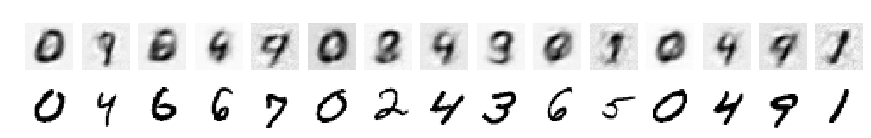

In [201]:
actvs = sess.run('layer6_ff/x:0', feed_dict={'x_in:0': mnist.inputs[:100]})
n = 15
f, ax = plt.subplots(2, n, figsize=(n,2))

for col in range(n):
  example = np.random.randint(actvs.shape[0])
  ax[1, col].matshow(mnist.inputs[example].reshape((28,28)))
  ax[0, col].matshow(actvs[example].reshape((28,28)))
  ax[1, col].axis('off')
  ax[0, col].axis('off')
plt.show()

In [ ]:
'layer4_ff/x:0'

In [184]:
[m.values() for m in sess.graph.get_operations()]

[(<tf.Tensor 'x_in:0' shape=(?, 784) dtype=float32>,),
 (<tf.Tensor 'y:0' shape=(?, 784) dtype=float32>,),
 (<tf.Tensor 'epoch:0' shape=<unknown> dtype=float32>,),
 (<tf.Tensor 'div/y:0' shape=() dtype=float32>,),
 (<tf.Tensor 'div:0' shape=<unknown> dtype=float32>,),
 (<tf.Tensor 'add/x:0' shape=() dtype=float32>,),
 (<tf.Tensor 'add:0' shape=<unknown> dtype=float32>,),
 (<tf.Tensor 'div_1/x:0' shape=() dtype=float32>,),
 (<tf.Tensor 'div_1:0' shape=<unknown> dtype=float32>,),
 (<tf.Tensor 'vars_Layer1/b:0' shape=(1, 100) dtype=float32_ref>,),
 (<tf.Tensor 'vars_Layer1/b/Initializer/Const:0' shape=(1, 100) dtype=float32>,),
 (<tf.Tensor 'vars_Layer1/b/Assign:0' shape=(1, 100) dtype=float32_ref>,),
 (<tf.Tensor 'vars_Layer1/b/read:0' shape=(1, 100) dtype=float32>,),
 (<tf.Tensor 'vars_Layer1/W:0' shape=(784, 100) dtype=float32_ref>,),
 (<tf.Tensor 'vars_Layer1/W/Initializer/random_uniform/shape:0' shape=(2,) dtype=int32>,),
 (<tf.Tensor 'vars_Layer1/W/Initializer/random_uniform/min:0' 

In [165]:
[v.name for v in tf.Graph.get_operations()]

TypeError: unbound method get_operations() must be called with Graph instance as first argument (got nothing instead)

In [36]:
tf.reset_default_graph()

In [37]:
with tf.variable_scope('vs_one') as vs1:
  with tf.name_scope('ns1') as ns1:
    W1 = tf.get_variable('W1', [1])
    add_op = W1+1.0

In [38]:
with tf.name_scope('vs_one'):
  sub_op = W1-1.0

In [39]:
sub_op.name

u'vs_one_1/sub:0'

In [24]:
W1.name

u'vs_one/W1:0'

In [30]:
add_op.name

u'vs_one/ns1/add:0'

In [126]:
tf.reset_default_graph()

In [127]:
ran = tf.random_normal([1])

In [128]:
out1 = ran+0
out2 = ran+1
out3 = out1-out2

In [129]:
sess = tf.Session()

In [138]:
sess.run([out1, out2, out3])

[array([-0.21435107], dtype=float32),
 array([ 0.78564894], dtype=float32),
 array([-1.], dtype=float32)]